<a href="https://colab.research.google.com/github/DragomirBozoki/HeartAttackRIskPrediction/blob/main/MLColabCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
from sklearn.metrics import make_scorer, recall_score
from sklearn.model_selection import GridSearchCV

In [ ]:
!gdown 1ZVWM-phR2Sm-hsxIUJCaFCmDA5WUPIxT -O heart_attack_prediction_dataset.csv

df = pd.read_csv('heart_attack_prediction_dataset.csv')
df.head()

Downloading...
From: https://drive.google.com/uc?id=1ZVWM-phR2Sm-hsxIUJCaFCmDA5WUPIxT
To: /content/heart_attack_prediction_dataset.csv
100% 1.46M/1.46M [00:00<00:00, 101MB/s]


,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,8763.0,53.707977,21.249509,18.000000,35.000000,54.000000,72.000000,90.000000
Cholesterol,8763.0,259.877211,80.863276,120.000000,192.000000,259.000000,330.000000,400.000000
Heart Rate,8763.0,75.021682,20.550948,40.000000,57.000000,75.000000,93.000000,110.000000
Diabetes,8763.0,0.652288,0.476271,0.000000,0.000000,1.000000,1.000000,1.000000
Family History,8763.0,0.492982,0.499979,0.000000,0.000000,0.000000,1.000000,1.000000
Smoking,8763.0,0.896839,0.304186,0.000000,1.000000,1.000000,1.000000,1.000000
Obesity,8763.0,0.501426,0.500026,0.000000,0.000000,1.000000,1.000000,1.000000
Alcohol Consumption,8763.0,0.598083,0.490313,0.000000,0.000000,1.000000,1.000000,1.000000
Exercise Hours Per Week,8763.0,10.014284,5.783745,0.002442,4.981579,10.069559,15.050018,19.998709
Previous Heart Problems,8763.0,0.495835,0.500011,0.000000,0.000000,0.000000,1.000000,1.000000


In [ ]:
df.describe(include = 'object').T

,count,unique,top,freq
Patient ID,8763,8763,BMW7812,1
Sex,8763,2,Male,6111
Blood Pressure,8763,3915,146/94,8
Diet,8763,3,Healthy,2960
Country,8763,20,Germany,477
Continent,8763,6,Asia,2543
Hemisphere,8763,2,Northern Hemisphere,5660


In [ ]:
df.dtypes

Patient ID                          object
Age                                  int64
Sex                                 object
Cholesterol                          int64
Blood Pressure                      object
Heart Rate                           int64
Diabetes                             int64
Family History                       int64
Smoking                              int64
Obesity                              int64
Alcohol Consumption                  int64
Exercise Hours Per Week            float64
Diet                                object
Previous Heart Problems              int64
Medication Use                       int64
Stress Level                         int64
Sedentary Hours Per Day            float64
Income                               int64
BMI                                float64
Triglycerides                        int64
Physical Activity Days Per Week      int64
Sleep Hours Per Day                  int64
Country                             object
Continent  

**Data Prep**

We are dropping the Patient ID column as it does not provide any useful information. We are splitting the Blood Pressure column into Systolic and Diastolic for better algorithm performance

In [ ]:
df.columns
df.drop(columns=['Patient ID'], inplace = True, axis = 1)

#Deljenje Blood Pressure na Sistolni i Dijastolni  150 / 60
df[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.split('/', expand=True).astype(int)
df.drop(['Blood Pressure'], inplace = True, axis = 1)

In [ ]:
print('The total number of features and samples is:', df.shape)

df_numeric = df.select_dtypes(include=[np.float64])
df_numeric['Cholesterol'] = df['Cholesterol']
df_numeric['Heart Rate'] = df['Heart Rate']
df_numeric['Income'] = df['Income']
df_numeric['Triglycerides'] = df['Triglycerides']
df_numeric['Systolic'] = df['Systolic']
df_numeric['Diastolic'] = df['Diastolic']
df_numeric['Age'] = df['Age']
df_numeric['Sleep Hours Per Day'] = df['Sleep Hours Per Day']

print(df_numeric.columns)
print('The number of numeric features is: ', df_numeric.shape[1])

print('')

The total number of features and samples is: (8763, 26)
Index(['Exercise Hours Per Week', 'Sedentary Hours Per Day', 'BMI',
       'Cholesterol', 'Heart Rate', 'Income', 'Triglycerides', 'Systolic',
       'Diastolic', 'Age', 'Sleep Hours Per Day'],
      dtype='object')
The number of numeric features is:  11



In [ ]:
nulls = df.isnull().sum().sort_values(ascending = False)
nulls

Age                                0
Sex                                0
Systolic                           0
Heart Attack Risk                  0
Hemisphere                         0
Continent                          0
Country                            0
Sleep Hours Per Day                0
Physical Activity Days Per Week    0
Triglycerides                      0
BMI                                0
Income                             0
Sedentary Hours Per Day            0
Stress Level                       0
Medication Use                     0
Previous Heart Problems            0
Diet                               0
Exercise Hours Per Week            0
Alcohol Consumption                0
Obesity                            0
Smoking                            0
Family History                     0
Diabetes                           0
Heart Rate                         0
Cholesterol                        0
Diastolic                          0
dtype: int64

In [ ]:
invalid = df.isna().any()
print(invalid)
print()

print(df_numeric.max())
print('')
print(df_numeric.min())

Age                                False
Sex                                False
Cholesterol                        False
Heart Rate                         False
Diabetes                           False
Family History                     False
Smoking                            False
Obesity                            False
Alcohol Consumption                False
Exercise Hours Per Week            False
Diet                               False
Previous Heart Problems            False
Medication Use                     False
Stress Level                       False
Sedentary Hours Per Day            False
Income                             False
BMI                                False
Triglycerides                      False
Physical Activity Days Per Week    False
Sleep Hours Per Day                False
Country                            False
Continent                          False
Hemisphere                         False
Heart Attack Risk                  False
Systolic        

# **Data Analysis**

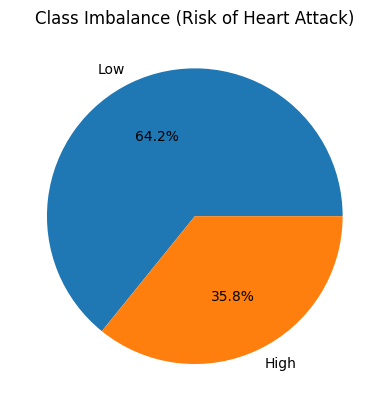

Heart Attack Risk
0                    0.641789
1                    0.358211
dtype: float64


In [ ]:
output_percentage = df[['Heart Attack Risk']].value_counts(normalize=True)

plt.pie(output_percentage, labels=['Low', 'High'], autopct="%1.1f%%")
plt.title("Class Imbalance (Risk of Heart Attack)")
plt.show()
print(output_percentage)

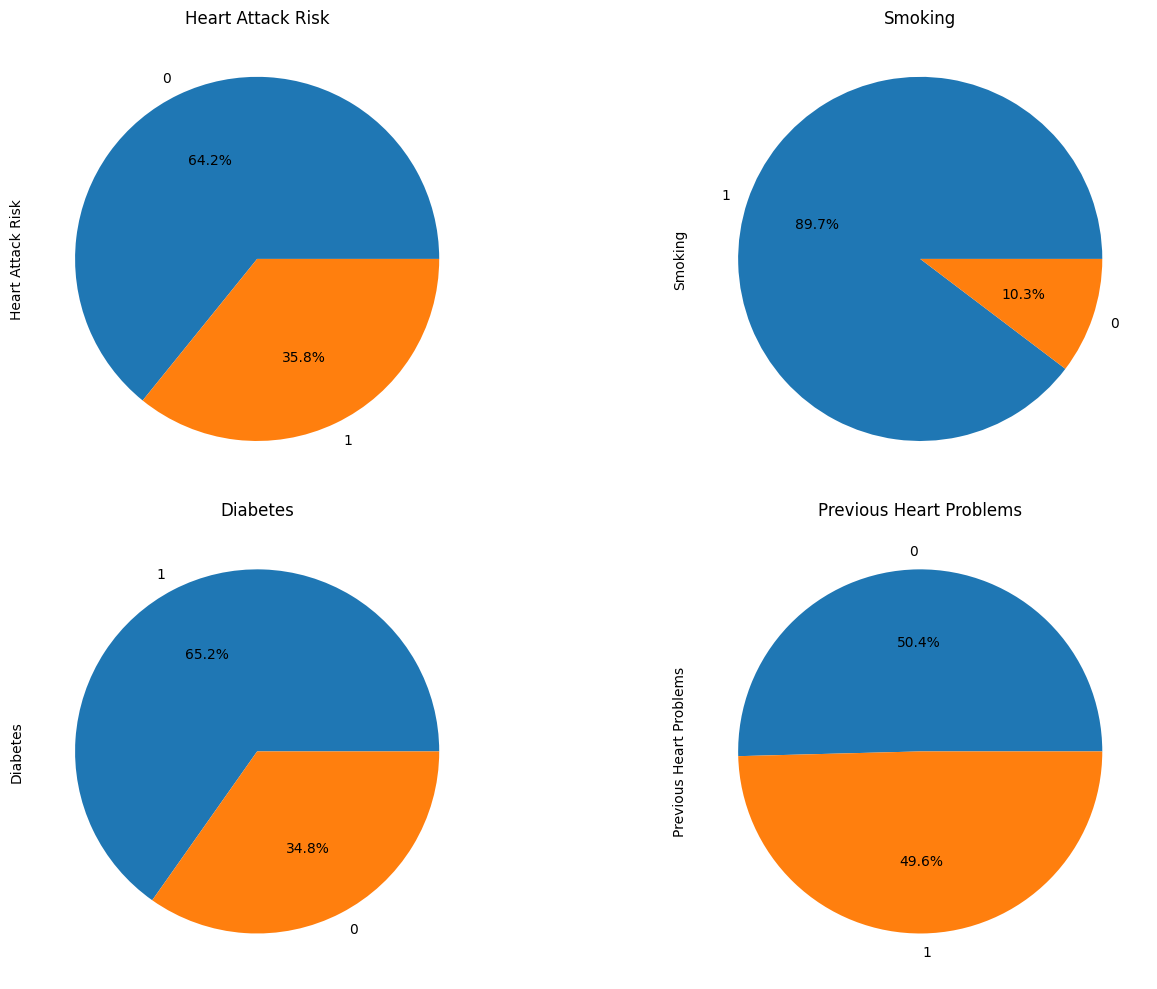

In [ ]:
plt.figure(figsize=(15, 10))

# Pie plot for Heart Attack Risk
plt.subplot(2, 2, 1)
pie_plot = df['Heart Attack Risk'].value_counts().plot.pie(autopct='%1.1f%%')
pie_plot.set_title('Heart Attack Risk')

# Pie plot for Smoking
plt.subplot(2, 2, 2)
pie_plot = df['Smoking'].value_counts().plot.pie(autopct='%1.1f%%')
pie_plot.set_title('Smoking')

# Pie plot for Diabetes
plt.subplot(2, 2, 3)
pie_plot = df['Diabetes'].value_counts().plot.pie(autopct='%1.1f%%')
pie_plot.set_title('Diabetes')

# Pie plot for Previous Heart Problems
plt.subplot(2, 2, 4)
pie_plot = df['Previous Heart Problems'].value_counts().plot.pie(autopct='%1.1f%%')
pie_plot.set_title('Previous Heart Problems')

plt.tight_layout()
plt.show()

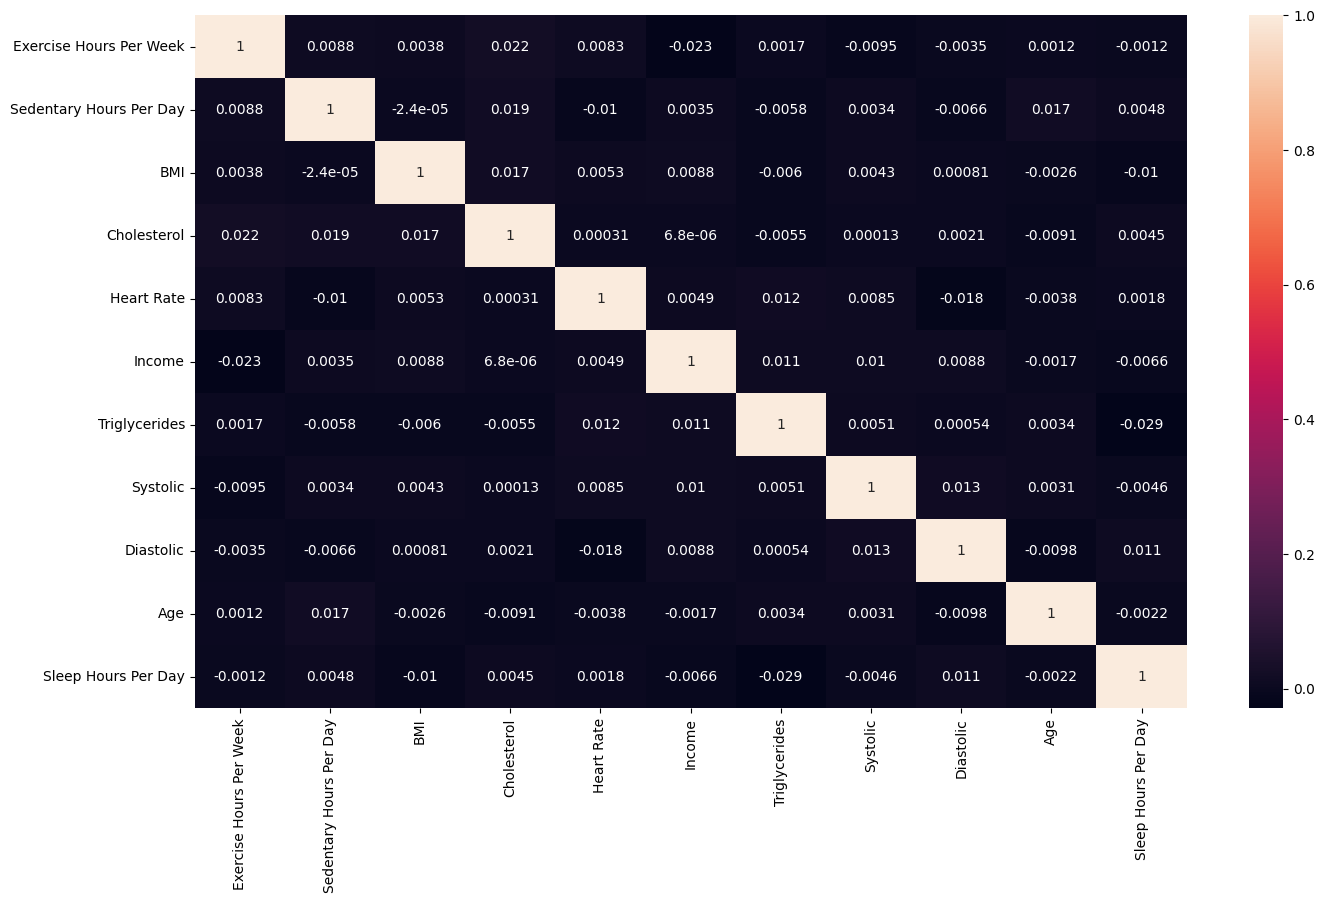

In [ ]:
correlacija = df_numeric
plt.figure(figsize=[16,9])
corr = correlacija.corr()
sns.heatmap(corr, annot=True)
plt.show()

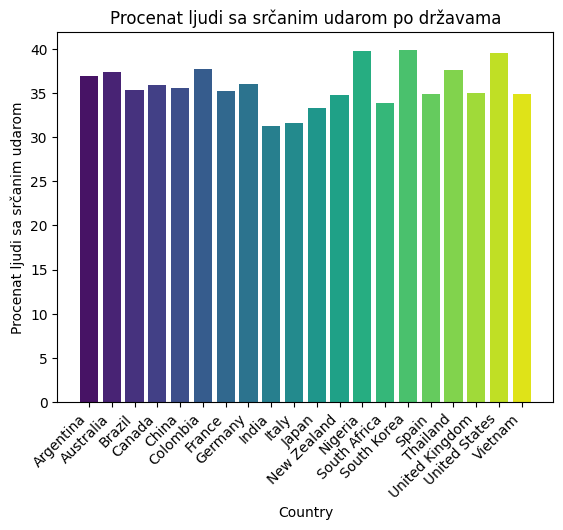

In [ ]:
percentage_by_country = df.groupby('Country')['Heart Attack Risk'].mean() * 100

colors = sns.color_palette('viridis', len(percentage_by_country))
plt.bar(percentage_by_country.index, percentage_by_country.values, color=colors)
plt.xlabel('Country')
plt.ylabel('Procenat ljudi sa srčanim udarom')
plt.title('Procenat ljudi sa srčanim udarom po državama')
plt.xticks(rotation=45, ha='right')  # Rotiramo X-osu za bolju preglednost.
plt.show()

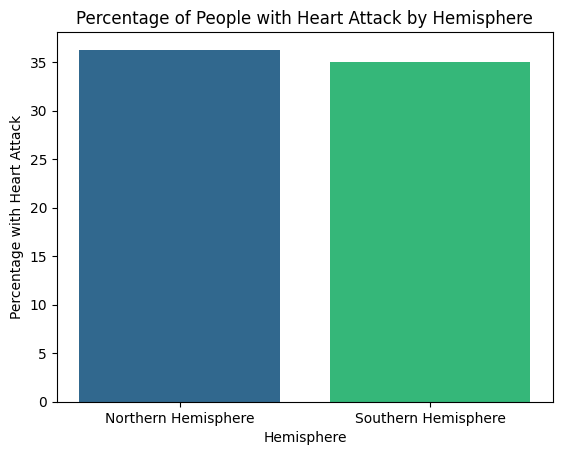

In [ ]:
percentage_by_hemisphere = df.groupby('Hemisphere')['Heart Attack Risk'].mean() * 100

colors = sns.color_palette('viridis', len(percentage_by_hemisphere))
plt.bar(percentage_by_hemisphere.index, percentage_by_hemisphere.values, color=colors)
plt.xlabel('Hemisphere')
plt.ylabel('Percentage with Heart Attack')
plt.title('Percentage of People with Heart Attack by Hemisphere')
plt.xticks(rotation=0, ha='center')  # Rotating the X-axis for better readability.
plt.show()

# **X y train_split**

In [ ]:
X = df.drop(columns = ['Heart Attack Risk', 'Country', 'Continent', 'Hemisphere'], axis = 1)
y = df['Heart Attack Risk']

In [ ]:
print(X['Diet'].unique())
print()

diet_mapping = {'Unhealthy': 2,
                'Average' : 1,
                'Healthy': 0}
X['Diet'] = X['Diet'].map(diet_mapping)
X['Diet'].head()

['Average' 'Unhealthy' 'Healthy']



0    1
1    2
2    0
3    1
4    2
Name: Diet, dtype: int64

In [ ]:
X = pd.get_dummies(X, prefix='dummy', drop_first=True)
X.head()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,...,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Systolic,Diastolic,dummy_Male
0,67,208,72,0,0,1,0,0,4.168189,1,...,9,6.615001,261404,31.251233,286,0,6,158,88,1
1,21,389,98,1,1,1,1,1,1.813242,2,...,1,4.963459,285768,27.194973,235,1,7,165,93,1
2,21,324,72,1,0,0,0,0,2.078353,0,...,9,9.463426,235282,28.176571,587,4,4,174,99,0
3,84,383,73,1,1,1,0,1,9.828130,1,...,9,7.648981,125640,36.464704,378,3,4,163,100,1
4,66,318,93,1,1,1,1,0,5.804299,2,...,6,1.514821,160555,21.809144,231,1,5,91,88,1


In [ ]:
X_category = X.select_dtypes(include = ['object', 'category', 'int64', 'bool'])
X_category.drop(columns = ['Cholesterol', 'Heart Rate', 'Income', 'Triglycerides', 'Systolic', 'Diastolic', 'Age', 'Sleep Hours Per Day', 'Physical Activity Days Per Week'], inplace = True, axis=1)
X_category['dummy_Male'] = X['dummy_Male']

print(X_category.columns)
print('')
print('Num of cathegoric:', X_category.shape[1])

Index(['Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Diet', 'Previous Heart Problems',
       'Medication Use', 'Stress Level', 'dummy_Male'],
      dtype='object')

Num of cathegoric: 10


In [ ]:
df_numeric.head()

,Exercise Hours Per Week,Sedentary Hours Per Day,BMI,Cholesterol,Heart Rate,Income,Triglycerides,Systolic,Diastolic,Age,Sleep Hours Per Day
0,4.168189,6.615001,31.251233,208,72,261404,286,158,88,67,6
1,1.813242,4.963459,27.194973,389,98,285768,235,165,93,21,7
2,2.078353,9.463426,28.176571,324,72,235282,587,174,99,21,4
3,9.828130,7.648981,36.464704,383,73,125640,378,163,100,84,4
4,5.804299,1.514821,21.809144,318,93,160555,231,91,88,66,5


In [ ]:
from imblearn.over_sampling import RandomOverSampler

over_sampler = RandomOverSampler(random_state=42)
X_oversampled, y_oversampled = over_sampler.fit_resample(X, y)

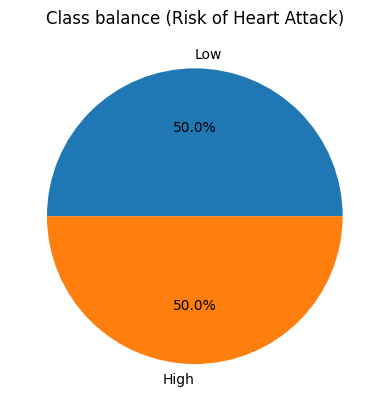

In [ ]:
output_percentage1 = y_oversampled.value_counts(normalize=True)

plt.pie(output_percentage1, labels=['Low', 'High'], autopct="%1.1f%%")
plt.title("Class balance (Risk of Heart Attack)")
plt.show()

train,test


In [ ]:
X_train_o, X_test_o, y_train_o, y_test_o = train_test_split(X_oversampled, y_oversampled, test_size = 0.1, random_state = 12)

In [ ]:
s = StandardScaler()
s.fit(X_train_o[df_numeric.columns])
x_train_std_o = s.transform(X_train_o[df_numeric.columns])
x_test_std_o = s.transform(X_test_o[df_numeric.columns])

x_train_std_o = pd.DataFrame(x_train_std_o, columns=df_numeric.columns)
x_test_std_o = pd.DataFrame(x_test_std_o, columns=df_numeric.columns)

pd.set_option('display.max_columns', None)
x_train_std_o.head()

,Exercise Hours Per Week,Sedentary Hours Per Day,BMI,Cholesterol,Heart Rate,Income,Triglycerides,Systolic,Diastolic,Age,Sleep Hours Per Day
0,-1.190263,1.109540,-1.368676,-0.721946,-0.292006,0.384581,0.719005,-0.045345,-0.754712,0.528795,-1.507160
1,-0.079618,0.683823,0.317978,1.187361,-0.146501,0.865804,-0.333336,0.907475,-1.505058,0.293063,0.003482
2,0.750496,-0.283410,-0.981049,-0.945111,-0.874024,-1.645651,0.954338,0.373896,0.473126,-1.404202,-1.507160
3,0.996479,1.272318,0.000038,1.224555,-1.650049,-0.270026,0.048526,-0.960053,-1.368632,-0.366985,-1.507160
4,-1.604993,-0.448287,-1.722848,-0.300410,0.775028,0.575426,-0.084682,-1.569858,-0.209006,-0.838447,0.003482


In [ ]:
X_train_o_cat = X_train_o[X_category.columns].reset_index(drop=True)
X_test_o_cat = X_test_o[X_category.columns].reset_index(drop=True)

X_train_std_o = pd.concat([X_train_o_cat, x_train_std_o], axis=1)
X_test_std_o = pd.concat([X_test_o_cat, x_test_std_o], axis=1)

X_train_std_o.head()

,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Diet,Previous Heart Problems,Medication Use,Stress Level,dummy_Male,Exercise Hours Per Week,Sedentary Hours Per Day,BMI,Cholesterol,Heart Rate,Income,Triglycerides,Systolic,Diastolic,Age,Sleep Hours Per Day
0,0,0,1,1,1,1,1,1,7,1,-1.190263,1.109540,-1.368676,-0.721946,-0.292006,0.384581,0.719005,-0.045345,-0.754712,0.528795,-1.507160
1,1,1,1,0,0,0,1,0,4,1,-0.079618,0.683823,0.317978,1.187361,-0.146501,0.865804,-0.333336,0.907475,-1.505058,0.293063,0.003482
2,1,1,0,0,0,2,0,1,3,0,0.750496,-0.283410,-0.981049,-0.945111,-0.874024,-1.645651,0.954338,0.373896,0.473126,-1.404202,-1.507160
3,1,0,1,0,1,1,0,1,5,1,0.996479,1.272318,0.000038,1.224555,-1.650049,-0.270026,0.048526,-0.960053,-1.368632,-0.366985,-1.507160
4,1,1,0,1,1,1,0,1,3,0,-1.604993,-0.448287,-1.722848,-0.300410,0.775028,0.575426,-0.084682,-1.569858,-0.209006,-0.838447,0.003482


# **X, y for RandomForestClassifier and Neural Network**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 12)

In [ ]:
s = StandardScaler()
s.fit(X_train[df_numeric.columns])
x_train_std = s.transform(X_train[df_numeric.columns])
x_test_std = s.transform(X_test[df_numeric.columns])

x_train_std = pd.DataFrame(x_train_std, columns=df_numeric.columns)
x_test_std = pd.DataFrame(x_test_std, columns=df_numeric.columns)

pd.set_option('display.max_columns', None)
x_train_std.head()

,Exercise Hours Per Week,Sedentary Hours Per Day,BMI,Cholesterol,Heart Rate,Income,Triglycerides,Systolic,Diastolic,Age,Sleep Hours Per Day
0,0.287233,0.088356,0.981053,0.103579,0.486039,-1.642159,0.484061,-1.638370,-1.319542,-0.879041,0.491848
1,1.531170,0.175235,-0.421043,1.252795,0.291389,0.365073,-1.694430,-1.258489,-1.661423,0.672820,1.499699
2,-0.143455,-0.382565,1.189152,0.672008,0.437376,-1.640383,0.108305,1.286718,-0.977661,1.002003,-1.523854
3,-0.138443,0.559499,0.009049,1.351652,1.313301,0.906196,-0.983177,-0.688667,-0.293898,1.331185,1.499699
4,-1.226812,-1.355190,0.990308,-1.156852,-0.584536,1.417231,1.025329,-0.574702,1.689013,-1.067145,1.499699


In [ ]:
X_train_cat = X_train[X_category.columns].reset_index(drop=True)
X_test_cat = X_test[X_category.columns].reset_index(drop=True)

X_train_std = pd.concat([X_train_cat, x_train_std], axis=1)
X_test_std = pd.concat([X_test_cat, x_test_std], axis=1)

X_train_std.head()

,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Diet,Previous Heart Problems,Medication Use,Stress Level,dummy_Male,Exercise Hours Per Week,Sedentary Hours Per Day,BMI,Cholesterol,Heart Rate,Income,Triglycerides,Systolic,Diastolic,Age,Sleep Hours Per Day
0,1,0,1,1,1,1,1,0,4,1,0.287233,0.088356,0.981053,0.103579,0.486039,-1.642159,0.484061,-1.638370,-1.319542,-0.879041,0.491848
1,1,0,1,1,1,2,1,1,6,0,1.531170,0.175235,-0.421043,1.252795,0.291389,0.365073,-1.694430,-1.258489,-1.661423,0.672820,1.499699
2,1,1,1,1,1,0,1,1,2,1,-0.143455,-0.382565,1.189152,0.672008,0.437376,-1.640383,0.108305,1.286718,-0.977661,1.002003,-1.523854
3,0,0,1,0,1,2,1,1,3,1,-0.138443,0.559499,0.009049,1.351652,1.313301,0.906196,-0.983177,-0.688667,-0.293898,1.331185,1.499699
4,1,0,0,0,1,2,0,0,8,0,-1.226812,-1.355190,0.990308,-1.156852,-0.584536,1.417231,1.025329,-0.574702,1.689013,-1.067145,1.499699


# **kNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
s = StandardScaler()
s.fit(X_train_o[df_numeric.columns])
x_train_std_o = s.transform(X_train_o[df_numeric.columns])
x_test_std_o = s.transform(X_test_o[df_numeric.columns])

x_train_std_o = pd.DataFrame(x_train_std_o, columns=df_numeric.columns)
x_test_std_o = pd.DataFrame(x_test_std_o, columns=df_numeric.columns)

pd.set_option('display.max_columns', None)
x_train_std_o.head()

,Exercise Hours Per Week,Sedentary Hours Per Day,BMI,Cholesterol,Heart Rate,Income,Triglycerides,Systolic,Diastolic,Age,Sleep Hours Per Day
0,-1.190263,1.109540,-1.368676,-0.721946,-0.292006,0.384581,0.719005,-0.045345,-0.754712,0.528795,-1.507160
1,-0.079618,0.683823,0.317978,1.187361,-0.146501,0.865804,-0.333336,0.907475,-1.505058,0.293063,0.003482
2,0.750496,-0.283410,-0.981049,-0.945111,-0.874024,-1.645651,0.954338,0.373896,0.473126,-1.404202,-1.507160
3,0.996479,1.272318,0.000038,1.224555,-1.650049,-0.270026,0.048526,-0.960053,-1.368632,-0.366985,-1.507160
4,-1.604993,-0.448287,-1.722848,-0.300410,0.775028,0.575426,-0.084682,-1.569858,-0.209006,-0.838447,0.003482


In [ ]:
X_train_cat = X_train[X_category.columns].reset_index(drop=True)
X_test_cat = X_test[X_category.columns].reset_index(drop=True)

X_train_std_rf = pd.concat([X_train_cat, x_train_std], axis=1)
X_test_std_rf = pd.concat([X_test_cat, x_test_std], axis=1)

X_train_std.head()

,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Diet,Previous Heart Problems,Medication Use,Stress Level,dummy_Male,Exercise Hours Per Week,Sedentary Hours Per Day,BMI,Cholesterol,Heart Rate,Income,Triglycerides,Systolic,Diastolic,Age,Sleep Hours Per Day
0,1,0,1,1,1,1,1,0,4,1,0.287233,0.088356,0.981053,0.103579,0.486039,-1.642159,0.484061,-1.638370,-1.319542,-0.879041,0.491848
1,1,0,1,1,1,2,1,1,6,0,1.531170,0.175235,-0.421043,1.252795,0.291389,0.365073,-1.694430,-1.258489,-1.661423,0.672820,1.499699
2,1,1,1,1,1,0,1,1,2,1,-0.143455,-0.382565,1.189152,0.672008,0.437376,-1.640383,0.108305,1.286718,-0.977661,1.002003,-1.523854
3,0,0,1,0,1,2,1,1,3,1,-0.138443,0.559499,0.009049,1.351652,1.313301,0.906196,-0.983177,-0.688667,-0.293898,1.331185,1.499699
4,1,0,0,0,1,2,0,0,8,0,-1.226812,-1.355190,0.990308,-1.156852,-0.584536,1.417231,1.025329,-0.574702,1.689013,-1.067145,1.499699


In [ ]:
parameters =  {
    'n_neighbors': [1,3, 5, 7, 9, 11,13,15],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']
}

clf_knn = KNeighborsClassifier()
clf_knn = GridSearchCV(clf_knn, parameters, scoring='recall', cv=10, verbose=3)
clf_knn.fit(x_train_std_o, y_train_o)

Fitting 10 folds for each of 256 candidates, totalling 2560 fits
[CV 1/10] END algorithm=auto, metric=euclidean, n_neighbors=1, weights=uniform;, score=0.797 total time=   0.3s
[CV 2/10] END algorithm=auto, metric=euclidean, n_neighbors=1, weights=uniform;, score=0.773 total time=   0.3s
[CV 3/10] END algorithm=auto, metric=euclidean, n_neighbors=1, weights=uniform;, score=0.799 total time=   0.2s
[CV 4/10] END algorithm=auto, metric=euclidean, n_neighbors=1, weights=uniform;, score=0.803 total time=   0.3s
[CV 5/10] END algorithm=auto, metric=euclidean, n_neighbors=1, weights=uniform;, score=0.793 total time=   0.2s
[CV 6/10] END algorithm=auto, metric=euclidean, n_neighbors=1, weights=uniform;, score=0.799 total time=   0.4s
[CV 7/10] END algorithm=auto, metric=euclidean, n_neighbors=1, weights=uniform;, score=0.775 total time=   0.9s
[CV 8/10] END algorithm=auto, metric=euclidean, n_neighbors=1, weights=uniform;, score=0.783 total time=   0.2s
[CV 9/10] END algorithm=auto, metric=eu

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski'],
                         'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15],
                         'weights': ['uniform', 'distance']},
             scoring='recall', verbose=3)

In [ ]:
print("Best score: ", clf_knn.best_score_)
print("Best hyperparameters: ", clf_knn.best_params_)

Best score:  0.8343533056888599
Best hyperparameters:  {'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 15, 'weights': 'distance'}


In [ ]:
classifier = KNeighborsClassifier(algorithm = 'auto', metric = 'euclidean', n_neighbors =  15, weights = 'distance')
classifier.fit(x_train_std_o, y_train_o)

y_pred_knn = classifier.predict(x_test_std_o)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
report_dict_knn = classification_report(y_test_o, y_pred_knn, output_dict=True)
report_df_knn = pd.DataFrame(report_dict_knn).transpose()

print('\t\t\t\tClassification Report of kNN:')
report_df_knn

				Classification Report of kNN:


,precision,recall,f1-score,support
0,0.740260,0.498252,0.595611,572.000
1,0.612162,0.819168,0.700696,553.000
accuracy,0.656000,0.656000,0.656000,0.656
macro avg,0.676211,0.658710,0.648154,1125.000
weighted avg,0.677293,0.656000,0.647266,1125.000


In [ ]:
conf_mat_knn = confusion_matrix(y_test_o, y_pred_knn, labels=classifier.classes_) # TN, FP
print(conf_mat_knn)

[[285 287]
 [100 453]]


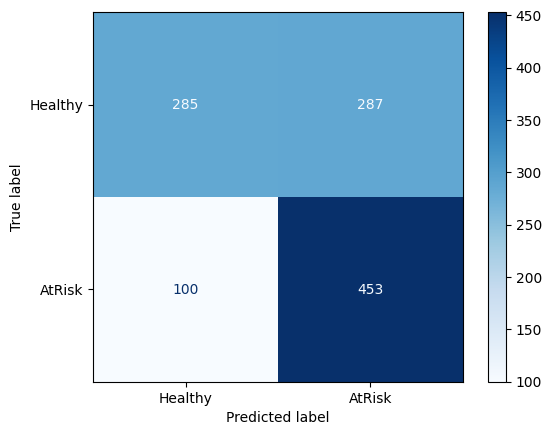

In [ ]:
labels = ['Healthy', 'AtRisk']
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat_knn,  display_labels=labels)
disp.plot(cmap="Blues")

In [ ]:
TP = conf_mat_knn[1, 1]
TN = conf_mat_knn[0, 0]
FP = conf_mat_knn[0, 1]
FN = conf_mat_knn[1, 0]
sensitivity = TP/(TP+FN)
print('Sensitivity: ',sensitivity)

Sensitivity:  0.8191681735985533


**RandomForestClassifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df_numeric_rf = df.select_dtypes(include=[np.float64])
df_numeric_rf['Cholesterol'] = df['Cholesterol']
df_numeric_rf['Heart Rate'] = df['Heart Rate']
df_numeric_rf['Income'] = df['Income']
df_numeric_rf['Triglycerides'] = df['Triglycerides']
df_numeric_rf['Systolic'] = df['Systolic']
df_numeric_rf['Diastolic'] = df['Diastolic']
df_numeric_rf['Stress Level'] = df['Stress Level']
df_numeric_rf['Physical Activity Days Per Week'] = df['Physical Activity Days Per Week']
df_numeric_rf['Sleep Hours Per Day'] = df['Sleep Hours Per Day']
df_numeric_rf['Diet'] = df['Diet']
df_numeric_rf['Age'] = df['Age']


print(df_numeric_rf.columns)
print('Broj numerickih obelezja je: ', df_numeric_rf.shape[1])

print('')

Index(['Exercise Hours Per Week', 'Sedentary Hours Per Day', 'BMI',
       'Cholesterol', 'Heart Rate', 'Income', 'Triglycerides', 'Systolic',
       'Diastolic', 'Stress Level', 'Physical Activity Days Per Week',
       'Sleep Hours Per Day', 'Diet', 'Age'],
      dtype='object')
Broj numerickih obelezja je:  14



In [ ]:
X_category = X.select_dtypes(include = ['object', 'category', 'int64', 'bool'])
X_category.drop(columns = ['Age', 'Cholesterol', 'Heart Rate', 'Income', 'Triglycerides', 'Systolic', 'Diastolic', 'Stress Level', 'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Diet'], inplace = True, axis=1)
X_category['dummy_Male'] = X['dummy_Male']

print(X_category.columns)
print('Broj kategorickih obelezja je:', X_category.shape[1])

Index(['Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Previous Heart Problems', 'Medication Use',
       'dummy_Male'],
      dtype='object')
Broj kategorickih obelezja je: 8


In [ ]:
s = StandardScaler()
s.fit(X_train[df_numeric_rf.columns])
x_train_std_rf = s.transform(X_train[df_numeric_rf.columns])
x_test_std_rf = s.transform(X_test[df_numeric_rf.columns])

x_train_std_rf = pd.DataFrame(x_train_std_rf, columns=df_numeric_rf.columns)
x_test_std_rf = pd.DataFrame(x_train_std_rf, columns=df_numeric_rf.columns)

pd.set_option('display.max_columns', None)
x_train_std_rf.head()

,Exercise Hours Per Week,Sedentary Hours Per Day,BMI,Cholesterol,Heart Rate,Income,Triglycerides,Systolic,Diastolic,Stress Level,Physical Activity Days Per Week,Sleep Hours Per Day,Diet,Age
0,0.287233,0.088356,0.981053,0.103579,0.486039,-1.642159,0.484061,-1.638370,-1.319542,-0.516940,-0.21334,0.491848,0.007140,-0.879041
1,1.531170,0.175235,-0.421043,1.252795,0.291389,0.365073,-1.694430,-1.258489,-1.661423,0.182723,-0.64976,1.499699,1.231140,0.672820
2,-0.143455,-0.382565,1.189152,0.672008,0.437376,-1.640383,0.108305,1.286718,-0.977661,-1.216602,-0.64976,-1.523854,-1.216861,1.002003
3,-0.138443,0.559499,0.009049,1.351652,1.313301,0.906196,-0.983177,-0.688667,-0.293898,-0.866771,1.09592,1.499699,1.231140,1.331185
4,-1.226812,-1.355190,0.990308,-1.156852,-0.584536,1.417231,1.025329,-0.574702,1.689013,0.882386,1.09592,1.499699,1.231140,-1.067145


In [ ]:
X_train_cat = X_train[X_category.columns].reset_index(drop=True)
X_test_cat = X_test[X_category.columns].reset_index(drop=True)

X_train_std_rf = pd.concat([X_train_cat, x_train_std_rf], axis=1)
X_test_std_rf = pd.concat([X_test_cat, x_test_std_rf], axis=1)

X_train_std_rf.head()

,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Previous Heart Problems,Medication Use,dummy_Male,Exercise Hours Per Week,Sedentary Hours Per Day,BMI,Cholesterol,Heart Rate,Income,Triglycerides,Systolic,Diastolic,Stress Level,Physical Activity Days Per Week,Sleep Hours Per Day,Diet,Age
0,1,0,1,1,1,1,0,1,0.287233,0.088356,0.981053,0.103579,0.486039,-1.642159,0.484061,-1.638370,-1.319542,-0.516940,-0.21334,0.491848,0.007140,-0.879041
1,1,0,1,1,1,1,1,0,1.531170,0.175235,-0.421043,1.252795,0.291389,0.365073,-1.694430,-1.258489,-1.661423,0.182723,-0.64976,1.499699,1.231140,0.672820
2,1,1,1,1,1,1,1,1,-0.143455,-0.382565,1.189152,0.672008,0.437376,-1.640383,0.108305,1.286718,-0.977661,-1.216602,-0.64976,-1.523854,-1.216861,1.002003
3,0,0,1,0,1,1,1,1,-0.138443,0.559499,0.009049,1.351652,1.313301,0.906196,-0.983177,-0.688667,-0.293898,-0.866771,1.09592,1.499699,1.231140,1.331185
4,1,0,0,0,1,0,0,0,-1.226812,-1.355190,0.990308,-1.156852,-0.584536,1.417231,1.025329,-0.574702,1.689013,0.882386,1.09592,1.499699,1.231140,-1.067145


In [ ]:
rf = RandomForestClassifier(random_state=42)

scorer = make_scorer(recall_score)

param_grid = {
    'n_estimators': [100, 150, 200, 300],
    'max_depth': [None, 5, 10, 20, 30],
    'max_features': ['sqrt', 'log2', None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}


grid_search_rf = GridSearchCV(estimator = rf, param_grid = param_grid, cv=5,
                    n_jobs = -1,verbose = 3, scoring = scorer)
grid_search_rf.fit(x_train_std_rf[1000:2000], y_train[1000:2000])


In [ ]:
best_rf_score = grid_search_rf.best_params_
best_rf_score

In [ ]:
rfc = RandomForestClassifier(max_depth = None, min_samples_leaf = 1, min_samples_split = 5, max_features = None, n_estimators = 200, bootstrap = False)
rfc.fit(x_train_std_rf, y_train)
y_pred_forest = rfc.predict(x_test_std_rf)

In [ ]:
conf_mat_forest = confusion_matrix(y_test, y_pred_forest[:877], labels=rfc.classes_)
print(conf_mat_forest)

[[368 190]
 [198 121]]


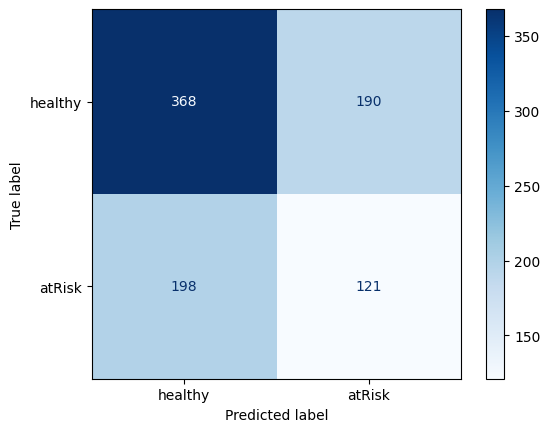

In [ ]:
labels = ['healthy', 'atRisk']
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat_forest,  display_labels=labels)

disp.plot(cmap="Blues")

In [ ]:
TP = conf_mat_forest[1, 1]
TN = conf_mat_forest[0, 0]
FP = conf_mat_forest[0, 1]
FN = conf_mat_forest[1, 0]
sensitivity = TP/(TP+FN)
print(sensitivity)

0.3793103448275862


NeuralNetwork

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
s = StandardScaler()
s.fit(X_train)
x_train_std_nn = s.transform(X_train)
x_test_std_nn = s.transform(X_test)

x_train_std_nn = pd.DataFrame(x_train_std_nn, columns=X_train.columns)
x_test_std_nn = pd.DataFrame(x_test_std_nn, columns=X_test.columns)

pd.set_option('display.max_columns', None)
x_train_std_nn.head()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Systolic,Diastolic,dummy_Male
0,-0.879041,0.103579,0.486039,0.729489,-0.990660,0.340659,0.996961,0.820082,0.287233,0.007140,1.012248,-1.001523,-0.516940,0.088356,-1.642159,0.981053,0.484061,-0.21334,0.491848,-1.638370,-1.319542,0.659243
1,0.672820,1.252795,0.291389,0.729489,-0.990660,0.340659,0.996961,0.820082,1.531170,1.231140,1.012248,0.998479,0.182723,0.175235,0.365073,-0.421043,-1.694430,-0.64976,1.499699,-1.258489,-1.661423,-1.516892
2,1.002003,0.672008,0.437376,0.729489,1.009428,0.340659,0.996961,0.820082,-0.143455,-1.216861,1.012248,0.998479,-1.216602,-0.382565,-1.640383,1.189152,0.108305,-0.64976,-1.523854,1.286718,-0.977661,0.659243
3,1.331185,1.351652,1.313301,-1.370822,-0.990660,0.340659,-1.003048,0.820082,-0.138443,1.231140,1.012248,0.998479,-0.866771,0.559499,0.906196,0.009049,-0.983177,1.09592,1.499699,-0.688667,-0.293898,0.659243
4,-1.067145,-1.156852,-0.584536,0.729489,-0.990660,-2.935485,-1.003048,0.820082,-1.226812,1.231140,-0.987900,-1.001523,0.882386,-1.355190,1.417231,0.990308,1.025329,1.09592,1.499699,-0.574702,1.689013,-1.516892


In [ ]:
classifier_nn = MLPClassifier()

param_grid = {
    'hidden_layer_sizes': [(50,50,50,50), (100,50,25,50,100)],
    'max_iter' : [250,500,1000],
    'solver' : ['adam'],
    'activation': ['tanh']
}

grid_search = GridSearchCV(classifier_nn, param_grid,scoring='recall',cv=5)
grid_search.fit(x_train_std_nn, y_train)

In [ ]:
bestMLP = grid_search.best_params_
bestMLP

In [ ]:
grid_search.best_score_

In [ ]:
classifier_nn_best = MLPClassifier(activation = 'tanh', hidden_layer_sizes = (50,50,50,50), max_iter = 100, solver = 'adam')
classifier_nn_best.fit(x_train_std_nn, y_train)
y_predicted_nn = classifier_nn_best.predict(x_test_std_nn)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
report_dict_nn = classification_report(y_test, y_predicted_nn, output_dict=True)
report_df_nn = pd.DataFrame(report_dict_nn).transpose()

report_df_nn

,precision,recall,f1-score,support
0,0.637138,0.670251,0.653275,558.00000
1,0.365517,0.332288,0.348112,319.00000
accuracy,0.547320,0.547320,0.547320,0.54732
macro avg,0.501328,0.501270,0.500693,877.00000
weighted avg,0.538339,0.547320,0.542275,877.00000


In [ ]:
conf_mat_nn = confusion_matrix(y_test, y_predicted_nn)
print(conf_mat_nn)

[[374 184]
 [213 106]]


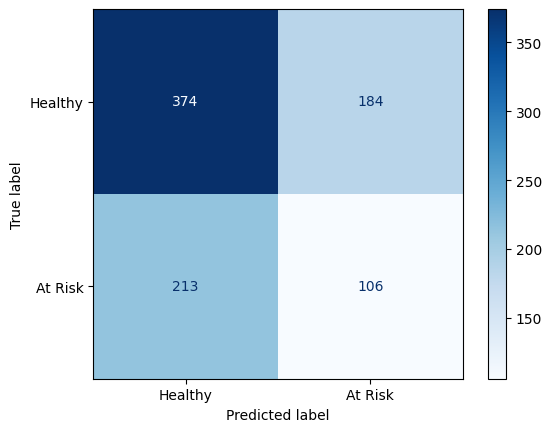

In [ ]:
labels = ['Healthy', 'At Risk']
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat_nn,  display_labels= labels)
disp.plot(cmap="Blues")

In [ ]:
TP = conf_mat_nn[1, 1]
TN = conf_mat_nn[0, 0]
FP = conf_mat_nn[0, 1]
FN = conf_mat_nn[1, 0]
sensitivity = TP/(TP+FN)
print(sensitivity)

0.3322884012539185


PCA Algorithm


In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca_o = PCA(n_components=0.85)
pca_o.fit(x_train_std_o, y_train_o)
pca_o.transform(x_train_std_o)
pca_o.transform(x_test_std_o)

x_train_pca_o = pca_o.transform(x_train_std_o)
x_test_pca_o = pca_o.transform(x_test_std_o)

In [ ]:
explained_variance_ratio = pca_o.explained_variance_ratio_

In [ ]:
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Number of components
n_components = len(explained_variance_ratio)

# Print the explained variance ratio of each component
for i in range(n_components):
    print(f"Explained variance ratio of component {i+1}: {explained_variance_ratio[i]}")

cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
# Print cumulative explained variance ratio
print("Cumulative explained variance ratio:", cumulative_variance_ratio)
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

Explained variance ratio of component 1: 0.09753343551039112
Explained variance ratio of component 2: 0.09517016535840887
Explained variance ratio of component 3: 0.09430825934925192
Explained variance ratio of component 4: 0.0930255947302253
Explained variance ratio of component 5: 0.09254691719119676
Explained variance ratio of component 6: 0.09050356880652746
Explained variance ratio of component 7: 0.08901001603025625
Explained variance ratio of component 8: 0.08813873444160752
Explained variance ratio of component 9: 0.0878622369856927
Explained variance ratio of component 10: 0.08634405348968344
Cumulative explained variance ratio: [0.09753344 0.1927036  0.28701186 0.38003745 0.47258437 0.56308794
 0.65209796 0.74023669 0.82809893 0.91444298]


In [ ]:
clf_knn_pca = KNeighborsClassifier(algorithm = 'auto', metric = 'euclidean', n_neighbors =  15, weights = 'distance')
clf_knn_pca.fit(x_train_pca_o, y_train_o)
y_pred_knn_pca = clf_knn_pca.predict(x_test_pca_o)

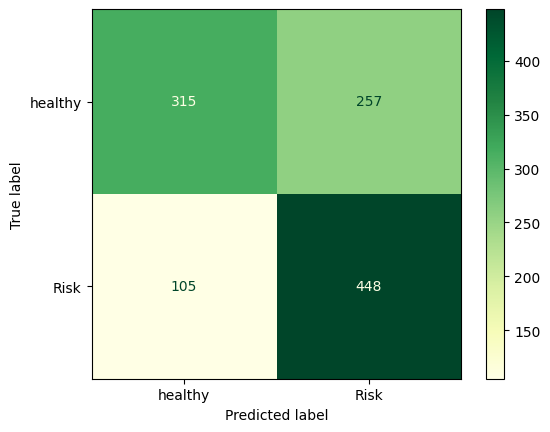

In [ ]:
conf_mat_knn_pca = confusion_matrix(y_test_o, y_pred_knn_pca, labels= clf_knn_pca.classes_) # TN, FP

labels = ['healthy', 'Risk']
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat_knn_pca,  display_labels= labels)
disp.plot(cmap="YlGn")

In [ ]:
TP = conf_mat_knn_pca[1, 1]
TN = conf_mat_knn_pca[0, 0]
FP = conf_mat_knn_pca[0, 1]
FN = conf_mat_knn_pca[1, 0]
sensitivity = TP/(TP+FN)
print(sensitivity)

0.810126582278481


In [ ]:
pca = PCA(n_components=0.90)
pca.fit(x_train_std, y_train)
pca.transform(x_train_std)
pca.transform(x_test_std)

x_train_pca = pca.transform(x_train_std)
x_test_pca = pca.transform(x_test_std)

In [ ]:
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_ratio

array([0.09544849, 0.09485681, 0.09322533, 0.09236521, 0.09154859,
       0.09065467, 0.08977433, 0.08926376, 0.08816739, 0.08775859])

In [ ]:
clf_rff_pca = RandomForestClassifier(max_depth = None, min_samples_leaf = 1, min_samples_split = 5, max_features = None, n_estimators = 200, bootstrap = False)
clf_rff_pca.fit(x_train_pca, y_train)
y_pred_rff_pca = clf_rff_pca.predict(x_test_pca)

In [ ]:
report_dict_rff_pca = classification_report(y_test, y_predicted_nn, output_dict=True)
report_df_rff_pca = pd.DataFrame(report_dict_rff_pca).transpose()

report_df_rff_pca

,precision,recall,f1-score,support
0,0.637138,0.670251,0.653275,558.00000
1,0.365517,0.332288,0.348112,319.00000
accuracy,0.547320,0.547320,0.547320,0.54732
macro avg,0.501328,0.501270,0.500693,877.00000
weighted avg,0.538339,0.547320,0.542275,877.00000


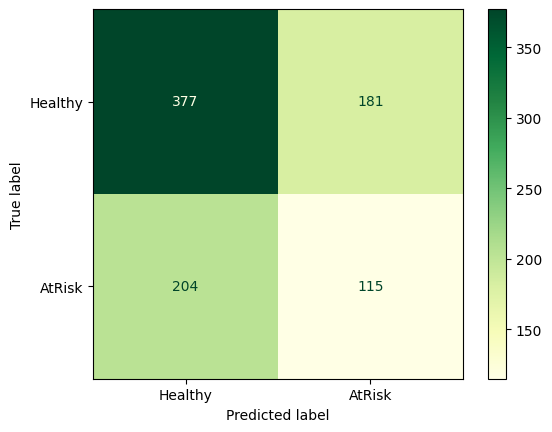

In [ ]:
labels = ['Healthy', 'AtRisk']
conf_mat_forest_pca = confusion_matrix(y_test, y_pred_rff_pca)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat_forest_pca,  display_labels = labels)
disp.plot(cmap="YlGn")

In [ ]:
TP = conf_mat_forest_pca[1, 1]
TN = conf_mat_forest_pca[0, 0]
FP = conf_mat_forest_pca[0, 1]
FN = conf_mat_forest_pca[1, 0]
sensitivity = TP/(TP+FN)
print(sensitivity)

0.3605015673981191


NeuralNetwork

In [ ]:
clf_nn_pca = MLPClassifier(activation = 'tanh', hidden_layer_sizes = (50,50,50,50), max_iter = 100, solver = 'adam')
clf_nn_pca.fit(x_train_pca, y_train)
y_pred_nn_pca = clf_nn_pca.predict(x_test_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


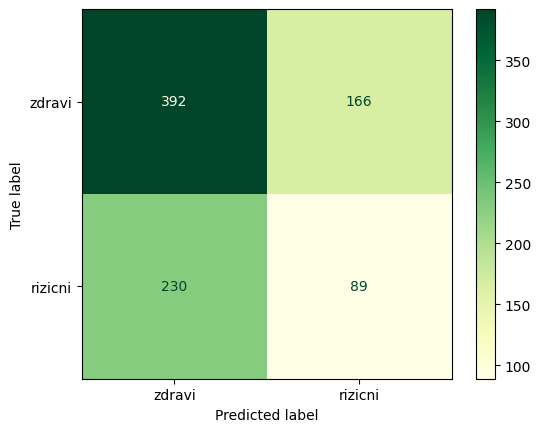

In [ ]:
labels = ['zdravi', 'rizicni']

conf_mat_nn_pca = confusion_matrix(y_test,y_pred_nn_pca)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat_nn_pca,  display_labels=labels)
disp.plot(cmap="YlGn")

In [ ]:
TP = conf_mat_nn_pca[1, 1]
TN = conf_mat_nn_pca[0, 0]
FP = conf_mat_nn_pca[0, 1]
FN = conf_mat_nn_pca[1, 0]
sensitivity = TP/(TP+FN)
print(sensitivity)

0.27899686520376177


**ROC**

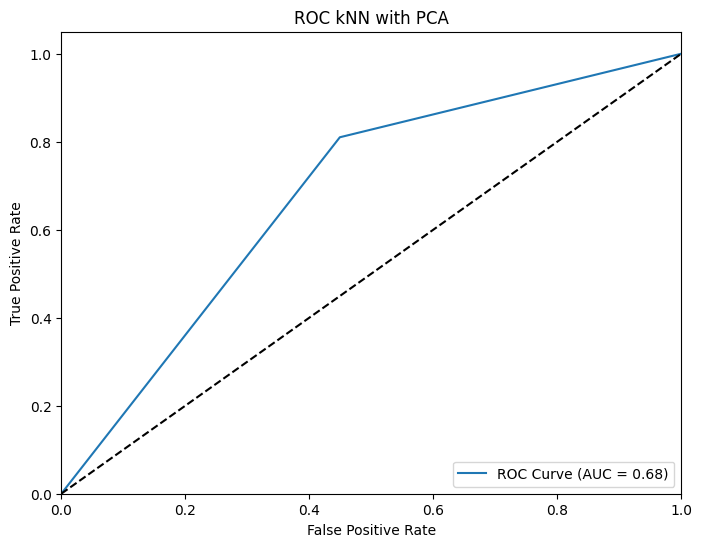

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test_o, y_pred_knn_pca)
auc = roc_auc_score(y_test_o, y_pred_knn_pca)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC kNN with PCA')
plt.legend(loc='lower right')
plt.show()

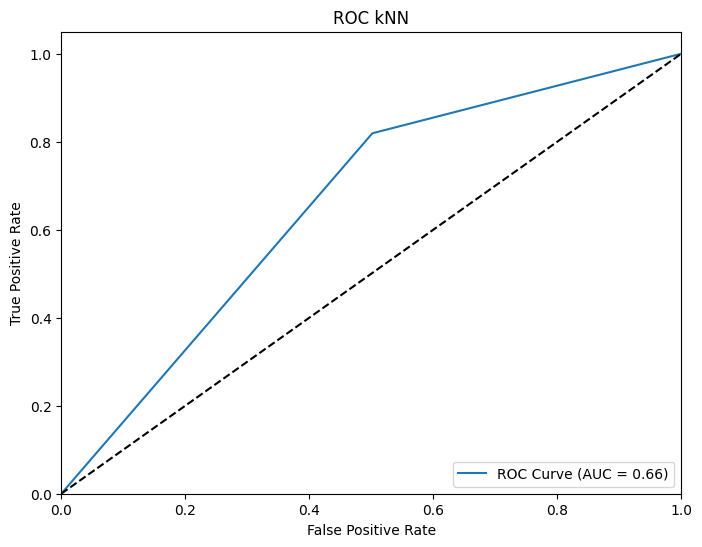

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test_o, y_pred_knn)
auc = roc_auc_score(y_test_o, y_pred_knn)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC kNN')
plt.legend(loc='lower right')
plt.show()

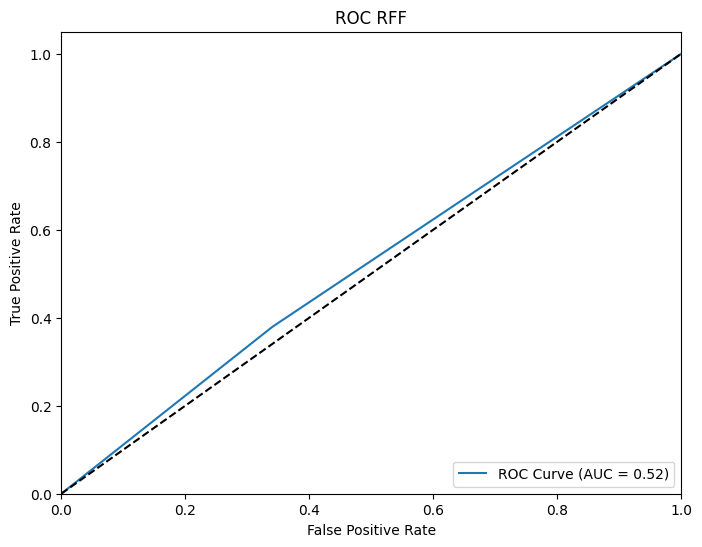

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_forest[:877])
auc = roc_auc_score(y_test, y_pred_forest[:877])


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC RFF')
plt.legend(loc='lower right')
plt.show()

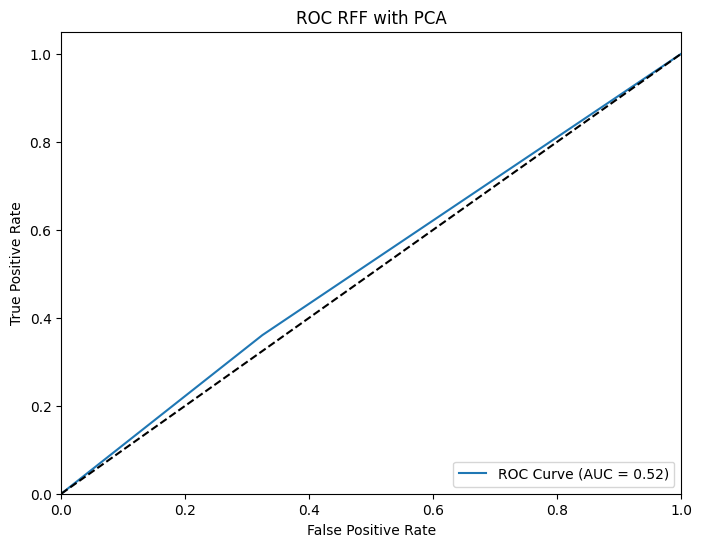

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rff_pca[:877])
auc = roc_auc_score(y_test, y_pred_rff_pca[:877])


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC RFF with PCA')
plt.legend(loc='lower right')
plt.show()

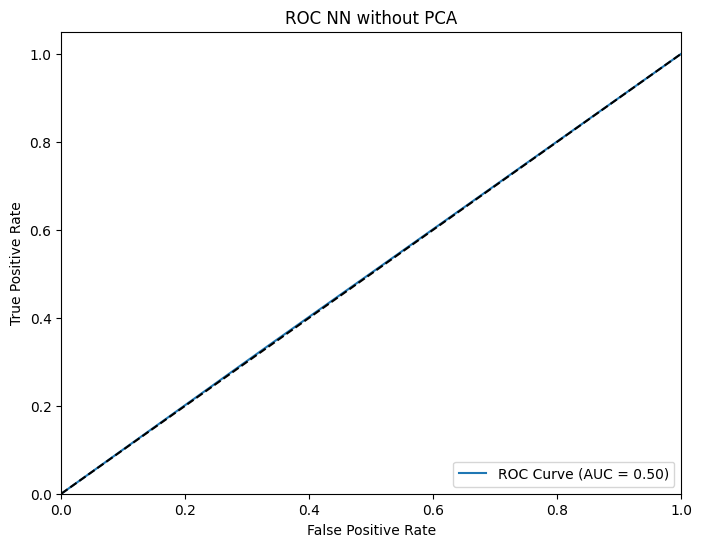

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_nn[:1122])
auc = roc_auc_score(y_test, y_predicted_nn[:1122])


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC NN without PCA')
plt.legend(loc='lower right')
plt.show()

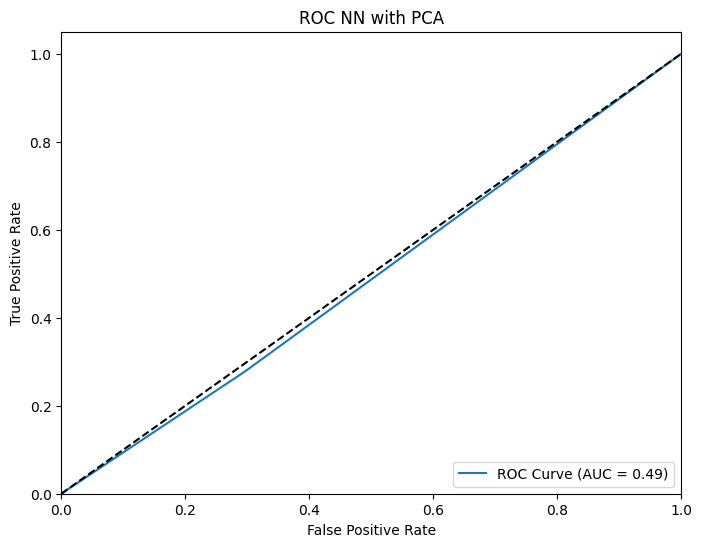

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_nn_pca[:1122])
auc = roc_auc_score(y_test, y_pred_nn_pca[:1122])


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC NN with PCA')
plt.legend(loc='lower right')
plt.show()

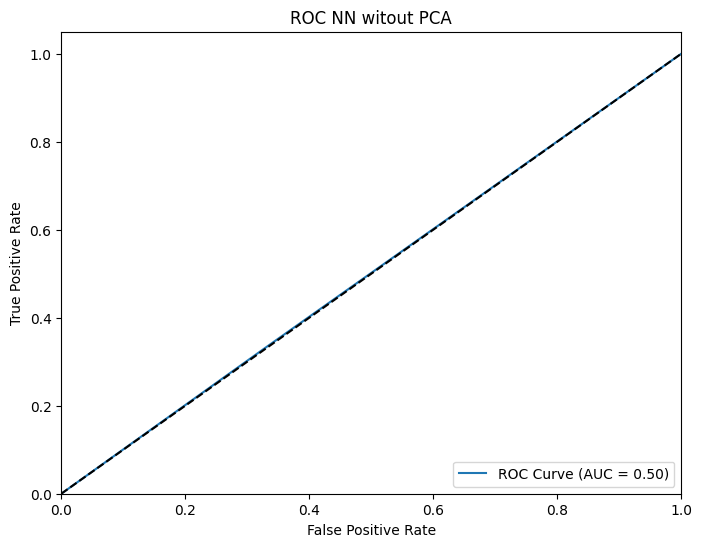

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_nn)
auc = roc_auc_score(y_test, y_predicted_nn)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC NN witout PCA')
plt.legend(loc='lower right')
plt.show()

In this scientific study, models tested exhibited
accuracy below 0.67 without oversampling. With
3169 positive risk indicators of heart attack, roughly
35% of the data, even the simplest model predicting all
instances as negative would achieve around 0.65
accuracy. This suggests the dataset is practically
useless for prediction due to lack of clear patterns and
real-world reflection. Such observations hold true for
models tested in this study and others. These results
likely stem from dataset characteristics, possibly
stemming from data generation algorithms like
ChatGPT, emphasizing the need for critical
examination of data quality and representativeness.
Additionally, there's a call for improved data
generation methods to ensure model reliability and
real-world applicability